In [21]:
import pandas as pd
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold,cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [68]:
# Load your data
data = pd.read_csv("ml_model_data.csv")

# Select the features and target
features = data[['SH', 'DOD_SOL', 'DOD_MOL', 'DOD_NAN', 'SOL_SIL', 'SOL_MOL', 'SIL_MOL', 'SIL_NAN',
                'MOL_NAN', 'SOL_NAN', 'SIL_DOD','d_DOD_SIL', 'rdf_peaks', 'rdf_dist', 'Frac_det']]
target = data['Surf_length']  # Adjust if target is in a different column

In [69]:
print(features.head())

   SH      DOD_SOL      DOD_MOL     DOD_NAN      SOL_SIL      SOL_MOL  \
0   0 -3015.193959 -2082.840781 -132.346609 -112729.6921 -7578.356286   
1   0 -3188.197113 -1964.187375 -263.570494 -112821.3507 -8005.210644   
2   0 -2830.234950 -1866.889675 -348.824962 -114924.6134 -7984.971516   
3   0 -3237.448726 -2048.532241 -357.677436 -114131.6696 -7882.882870   
4   0 -2884.037610 -1947.445001 -295.698767 -114938.5579 -8265.680904   

       SIL_MOL      SIL_NAN     MOL_NAN      SOL_NAN    SIL_DOD  d_DOD_SIL  \
0 -1724.537763 -53776.76570 -756.148356 -4212.313878 -17.396953 -18.780941   
1 -1526.882049 -44901.39211 -301.895760 -3770.525177   0.126798  -1.257190   
2 -1618.940756 -35725.62623 -531.670610 -3001.454626   1.977084   0.593097   
3 -2005.260598 -27097.81505 -259.779031 -2867.353841 -26.850934 -28.234922   
4 -1533.482469 -18714.72609 -210.237799 -2462.791993 -14.729662 -16.113649   

   rdf_peaks  rdf_dist  Frac_det  
0      1.410     3.570      0.69  
1      1.325     3.706

In [70]:
print(target.head())

0    3
1    3
2    3
3    3
4    3
Name: Surf_length, dtype: int64


/tmp/ipykernel_11322/2369075320.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontname='serif', fontweight='bold')


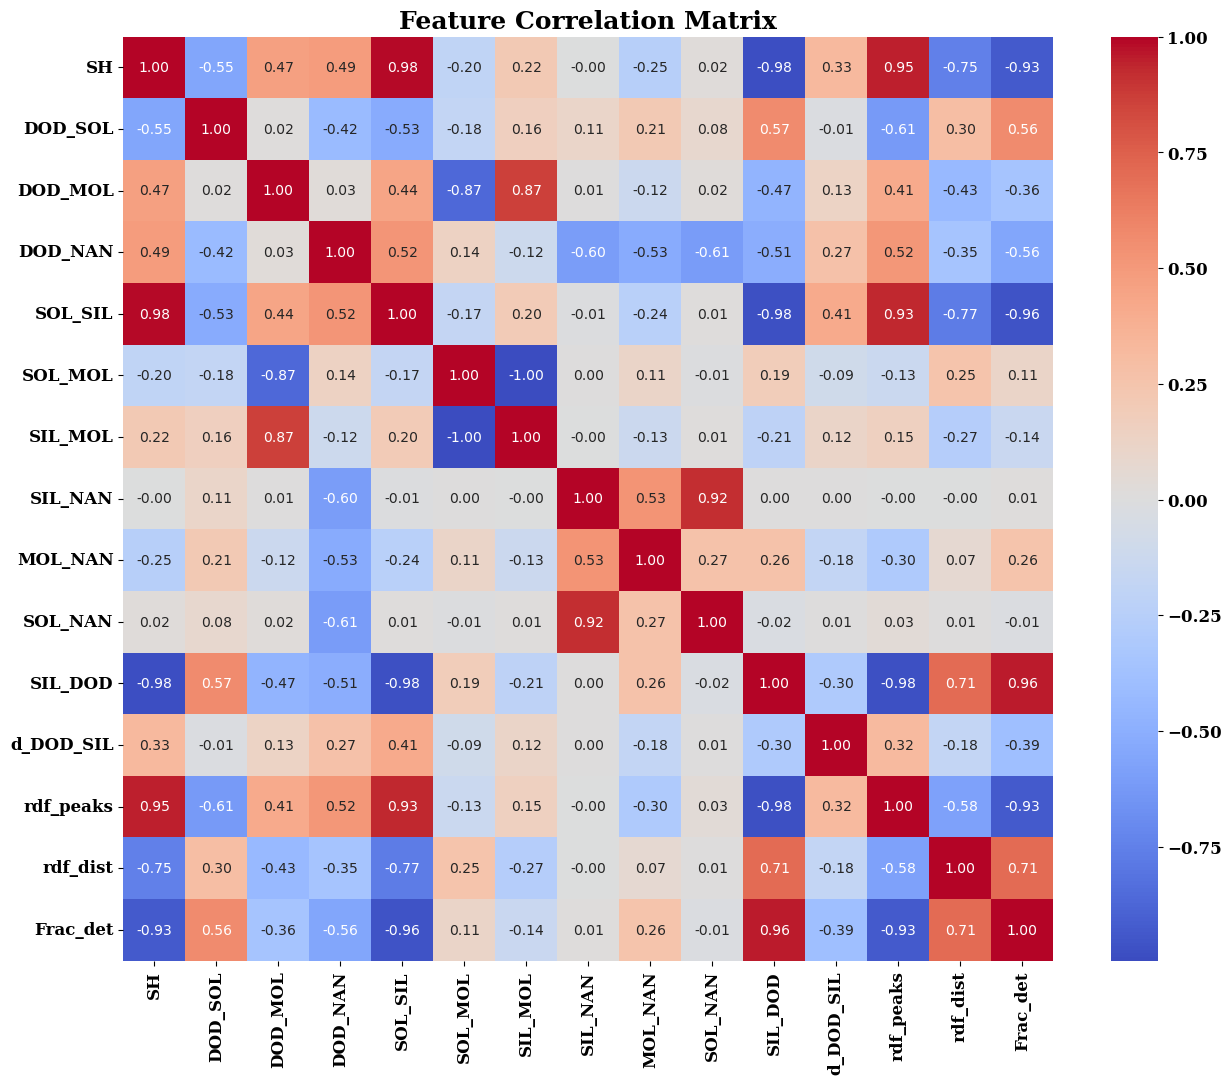

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = features.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Matrix', fontsize=18, fontname='serif', fontweight='bold')

# Customize the xticks and yticks
plt.xticks(fontsize=12, fontname='serif', fontweight='bold', rotation=90)
plt.yticks(fontsize=12, fontname='serif', fontweight='bold', rotation=0)

# Customize the cbar ticks
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)  # Adjust the size of the cbar ticks
cbar.ax.yaxis.set_tick_params(labelsize=12)
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontname='serif', fontweight='bold')

plt.savefig("feature_correlation.png", dpi=250)


In [72]:
# Create Interaction Features
#interaction_features = pd.DataFrame()


In [73]:

# interaction_features['SIL_MOL_squared'] = features['SIL_MOL'] ** 2
# interaction_features['SIL_NAN_squared'] = features['SIL_NAN'] ** 2
# interaction_features['DOD_MOL_times_DOD_NAN'] = features['DOD_MOL'] * features['DOD_NAN']
# interaction_features['ratio_fraction_detached_d_DOD_SIL'] = features['Fraction_detached']/features['d_DOD_SIL']
# interaction_features['SH_SOL_MOL_SOL_NAN'] = features['Surface_Hydrophobicity'] + features['SOL_MOL'] + features['SOL_NAN']


In [74]:
# Combine all features into one DataFrame
#feature_engineered_df = pd.concat([features,interaction_features], axis=1)

# Apply RobustScaler
scaler = RobustScaler()
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

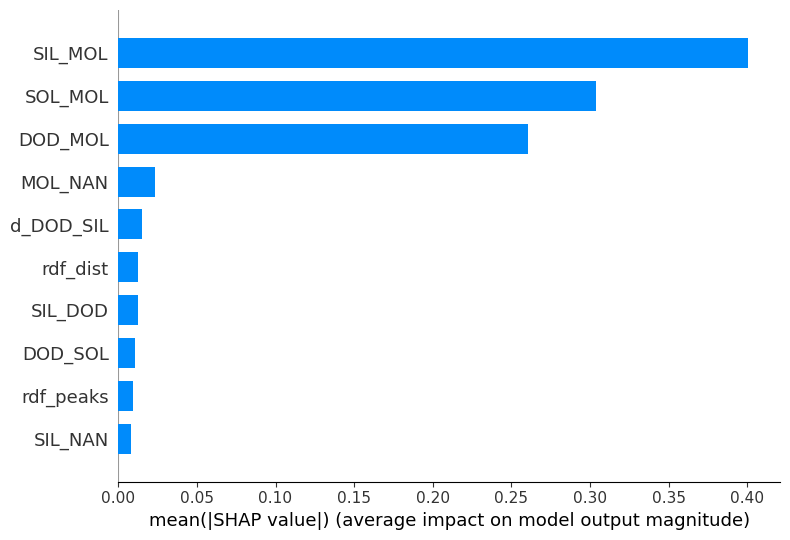

In [78]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.1, random_state=196)

# Train a RandomForestRegressor
model = RandomForestRegressor(random_state=196)
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train)

# Plot SHAP summary plot for the new features
shap.summary_plot(shap_values, X_train, plot_type="bar", color_bar=True, max_display=10)


Test R-squared: 0.9413
Test Mean Squared Error: 0.0945
Test Mean Absolute Error: 0.2640
Test Explained Variance: 0.9434


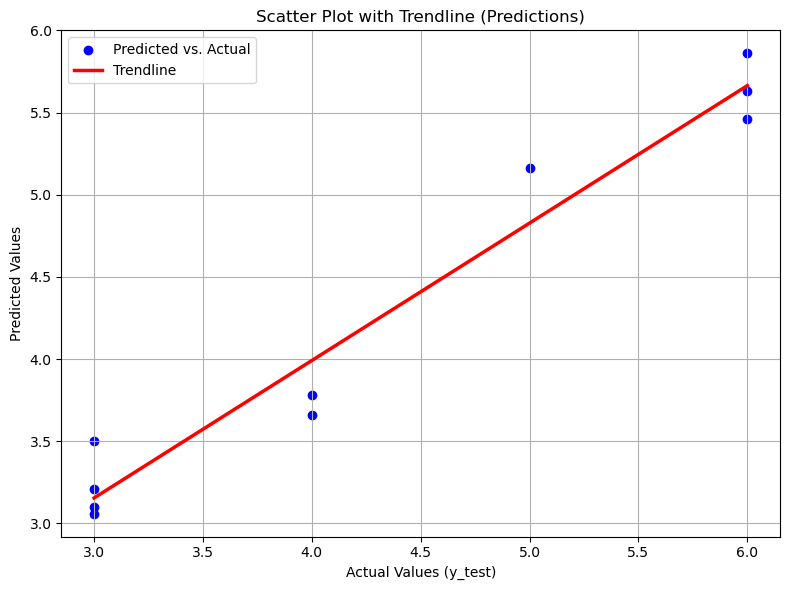

In [76]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

print(f'Test R-squared: {r2:.4f}')
print(f'Test Mean Squared Error: {mse:.4f}')
print(f'Test Mean Absolute Error: {mae:.4f}')
print(f'Test Explained Variance: {explained_variance:.4f}')

# Plot the actual vs predicted values with a trendline
slope, intercept = np.polyfit(y_test, y_pred, 1)
x_trend = np.linspace(min(y_test), max(y_test), 100)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=1.0, label="Predicted vs. Actual")
plt.plot(x_trend, slope * x_trend + intercept, color="red", label="Trendline", lw=2.5)

plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot with Trendline (Predictions)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()